<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/8-3%20%ED%95%A9%EC%84%B1%EA%B3%B1%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망의 시각화

## 가중치 시각화

#### 저장된 best cnn model.h5 읽어 오기

In [1]:
!wget https://github.com/fasthill/ML-DL-study-alone/raw/main/best_cnn_model.h5  # github 데이터 이용 -- repo이름/raw/main/ branch 이름 삽입

--2022-03-07 06:41:24--  https://github.com/fasthill/ML-DL-study-alone/raw/main/best_cnn_model.h5
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fasthill/ML-DL-study-alone/main/best_cnn_model.h5 [following]
--2022-03-07 06:41:25--  https://raw.githubusercontent.com/fasthill/ML-DL-study-alone/main/best_cnn_model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4049416 (3.9M) [application/octet-stream]
Saving to: ‘best_cnn_model.h5’

best_cnn_model.h5   100%[===================>]   3.86M  --.-KB/s    in 0.09s   

2022-03-07 06:41:25 (44.7 MB/s) - ‘best_cnn_model.h5’ saved [4049416/4049416]



In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
model = load_model('best_cnn_model.h5')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [5]:
model.layers

In [6]:
type(model.layers[0])

keras.layers.convolutional.Conv2D

In [7]:
# dir(model.layers[0])

In [8]:
model.layers[0].kernel.shape

TensorShape([3, 3, 1, 32])

In [9]:
conv = model.layers[0]  # 첫번째 layer

In [10]:
print('kernel size : {} \nbias_size : {}'.format(conv.weights[0].shape, conv.weights[1].shape))
# 필터 갯수 32, kernel size; 3 by 3 by 1 channel
# 절편은 filter 갯수

kernel size : (3, 3, 1, 32) 
bias_size : (32,)


In [11]:
conv_weights = conv.weights[0].numpy()

In [12]:
conv_weights.shape

(3, 3, 1, 32)

In [13]:
print(conv_weights.mean(), conv_weights.std())

-0.008936822 0.21529211


In [14]:
print(conv_weights.max(), conv_weights.min())

0.37304044 -1.3444066


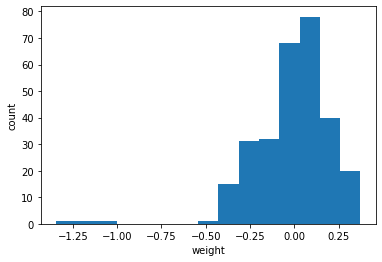

In [15]:
plt.hist(conv_weights.reshape(-1, 1), bins=15)
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

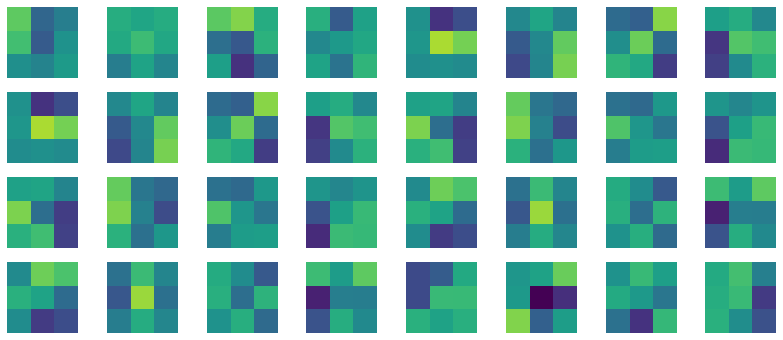

In [16]:
figs, axs = plt.subplots(4, 8, figsize=(14,6))
for i in range(4):
  for j in range(8):
    # axs[i,j].imshow(conv_weights[:,:,0,i*4 + j])
    axs[i,j].imshow(conv_weights[:,:,0,i*4 + j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')

In [17]:
no_training_model = Sequential()
no_training_model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [18]:
no_training_model.layers  # 한 개의 layer만 있음.

In [19]:
no_training_conv = no_training_model.layers[0]
print('kernel size : {}'.format(no_training_conv.weights[0].shape))
# 필터 갯수 32, kernel size; 3 by 3 by 1 channel

kernel size : (3, 3, 1, 32)


In [20]:
no_training_weights = no_training_conv.weights[0].numpy()

In [21]:
print(no_training_weights.mean(), no_training_weights.std())

0.009820461 0.082429156


In [22]:
no_training_weights.shape

(3, 3, 1, 32)

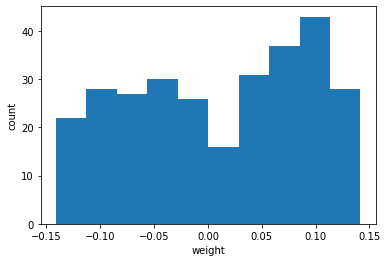

In [23]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

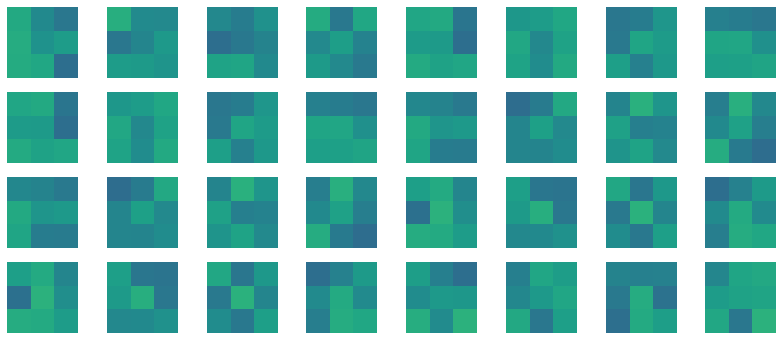

In [24]:
figs, axs = plt.subplots(4, 8, figsize=(14,6))
for i in range(4):
  for j in range(8):
    # axs[i,j].imshow(conv_weights[:,:,0,i*4 + j])
    axs[i,j].imshow(no_training_weights[:,:,0,i*4 + j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

## 함수형 API

#### sequential API에서는 model = Sequential() 선언후 model.add() 등으로 진행하나, <br> 
#### functional API에서는 model =  Model()로 객체 구성을 마지막에 구성함.

In [25]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [26]:
conv_acti = Model(model.input, model.layers[0].output)

In [27]:
# conv_one = Conv2D(32, kernel_size=3, activation='relu', padding='same')
# conv_two = Conv2D(64, kernel_size=3, activation='relu', padding='same')
# maxpooling = MaxPooling2D(2)
# flatten = Flatten()
# dense_one = Dense(100, activation='relu')
# dropout = Dropout(0.4)
# dense_two = Dense(10, activation='softmax')

# inputs = Input(shape=(28,28,1))
# conv1 = conv_one(input)
# maxpool1 = maxpooling(conv1)
# conv2 = conv_two(maxpool1)
# maxpool2 = maxpooling(conv2)
# flatten1 = flatten(maxpool2)(maxpool2)
# dense1 = dense_one(flatten1)
# dropout1 = dropout(dense1)
# output = dense_two(dropout1)
# model = Model(inputs=inputs, outputs=output)

위와 같이 객체를 구성하여 해도 되고, 아래와 같이 직접 구성해도 됨.

In [28]:
inputs = Input(shape=(28,28,1))
conv1 = Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
maxpool1 = MaxPooling2D(2)(conv1)
conv2 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(maxpool1)
maxpool2 = MaxPooling2D(2)(conv2)
flatten1 = Flatten()(maxpool2)
dense1 = Dense(100, activation='relu')(flatten1)
dropout1 = Dropout(0.4)(dense1)
output = Dense(10, activation='softmax')(dropout1)
model_f = Model(inputs=inputs, outputs=output)

In [29]:
model_f.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [30]:
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28,28,1) / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [31]:
checkpoint_cb = ModelCheckpoint('best_cnn_model_func_API.h5', save_best_only=True)

In [32]:
early_stopping_cb = EarlyStopping(patience=2, restore_best_weights=True)

In [33]:
history = model_f.fit(train_scaled, train_target, epochs=20, verbose=1,
          callbacks=[checkpoint_cb, early_stopping_cb], 
          validation_data = (val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 102s 67ms/step - loss: 0.5303 - accuracy: 0.8109 - val_loss: 0.3163 - val_accuracy: 0.8843
Epoch 2/20
1500/1500 [==============================] - 94s 63ms/step - loss: 0.3513 - accuracy: 0.8749 - val_loss: 0.2823 - val_accuracy: 0.8969
Epoch 3/20
1500/1500 [==============================] - 89s 59ms/step - loss: 0.3037 - accuracy: 0.8902 - val_loss: 0.2590 - val_accuracy: 0.9034
Epoch 4/20
1500/1500 [==============================] - 92s 61ms/step - loss: 0.2697 - accuracy: 0.9018 - val_loss: 0.2406 - val_accuracy: 0.9097
Epoch 5/20
1500/1500 [==============================] - 90s 60ms/step - loss: 0.2441 - accuracy: 0.9100 - val_loss: 0.2333 - val_accuracy: 0.9129
Epoch 6/20
1500/1500 [==============================] - 90s 60ms/step - loss: 0.2240 - accuracy: 0.9165 - val_loss: 0.2381 - val_accuracy: 0.9140
Epoch 7/20
1500/1500 [==============================] - 89s 59ms/step - loss: 0.2079 - accuracy: 0.9237 - val_loss: 0.2336 

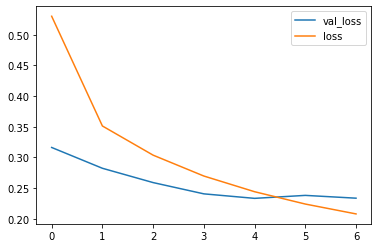

In [34]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val_loss', 'loss'])
plt.show()

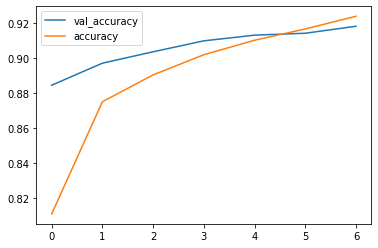

In [35]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val_accuracy', 'accuracy'])
plt.show()

In [36]:
print(f'best_epoch: {early_stopping_cb.best_epoch}, stopped_epoch: {early_stopping_cb.stopped_epoch}')

best_epoch: 4, stopped_epoch: 6


In [37]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 8s 20ms/step - loss: 0.2599 - accuracy: 0.9062


[0.25985726714134216, 0.90625]

## 특성 맵 시각화

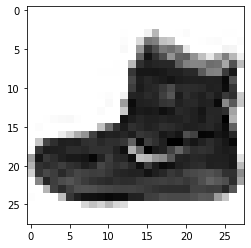

In [38]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [39]:
train_input.shape

(60000, 28, 28)

##### 배열 슬라이싱을 하면 원래의 shape 유지함. train_input[<span style='color:red'> 0:1 </span>].shape  ==> (1, 28, 28)<br> 배열 슬라이싱이 아니면 한개의 차원이 축소됨. train_input[0].shape ==> (28, 28)

In [40]:
train_input[0:1].shape

(1, 28, 28)

In [41]:
train_input[0].shape

(28, 28)

In [42]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

In [43]:
feature_maps = conv_acti.predict(inputs)

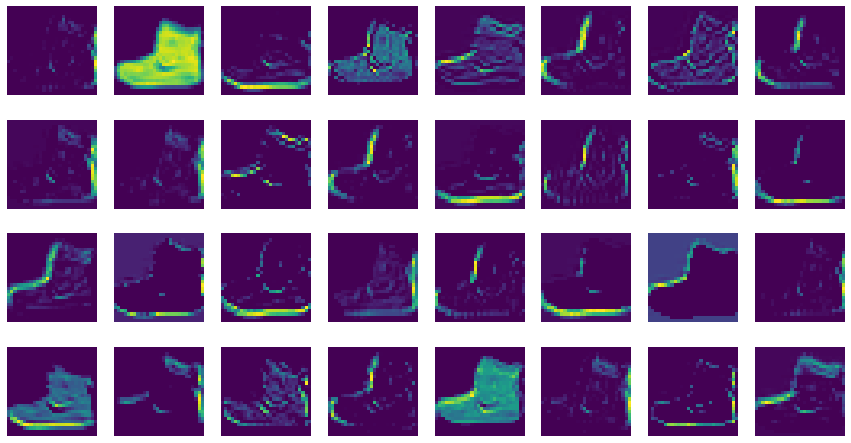

In [44]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [44]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [45]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

In [46]:
print(feature_maps.shape)

(1, 14, 14, 64)


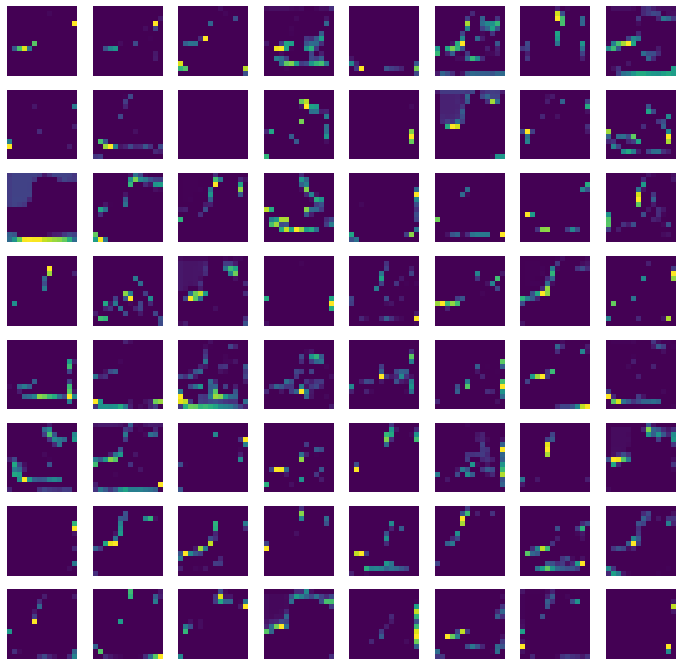

In [47]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()